*Universidad de Buenos Aires >> Facultad de Ciencias Exactas y Naturales >> Ciencias de Datos
Laboratorio de Datos - Primer Cuatrimestre 2024*
# **Trabajo Práctico N° 2**

## **Turno noche - Grupo 2**

**Integrantes:**
*   César Alejandro Momberg
*   Matías Gabriel Resnik

In [1]:
import pandas as pd
import numpy as np
import seaborn.objects as so
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

## **Preprocesamiento de Datos**

1. Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.  

In [2]:
df_torneos_original=pd.read_csv("FBRef2020-21.csv")
df_torneos_original

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


2. Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min).

In [3]:
jugaron_menos_500_min=df_torneos_original.query("Min<500").index
df_torneos=df_torneos_original.drop(jugaron_menos_500_min)
df_torneos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


3. Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y
luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.

In [4]:
# Se eliminan las columnas que tienen mas de 100 filas con valores faltantes:
columnas_valores_nan= df_torneos.isna().sum()
df_torneos.drop(columns=columnas_valores_nan[columnas_valores_nan>100].index,inplace=True)

# Se cuenta la cantidad de filas que tienen alguna columna con valor faltante:
print("¿Hay filas con valores faltantes?")
print((df_torneos.isna().sum(axis=1)>0).value_counts())

# Al ser poca la cantidad de filas (60), se podrían eliminar o completar con algún valor
# Se decide completar con el valor 0
df_torneos.fillna(0,inplace=True)

# Se verifica que no quedan filas con valores faltantes
print("---------------------------------\n")
print("¿Quedan filas con valores faltantes?")
print((df_torneos.isna().sum(axis=1)>0).value_counts())


¿Hay filas con valores faltantes?
False    1902
True       60
Name: count, dtype: int64
---------------------------------

¿Quedan filas con valores faltantes?
False    1962
Name: count, dtype: int64


4. Al finalizar la limpieza de datos, resetear los índices.

In [5]:
df_torneos.reset_index(drop=True,inplace=True)
df_torneos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1958,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1959,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1960,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


5. Definir el DataFrame **data_num** que solo contenga las variables numéricas, a partir de la
columna *Ast/90*, inclusive. Para clustering y clasificación no vamos a utilizar las variables
categóricas ni edad ni minutos jugados.

In [6]:
# Se busca la posición de la columna 'Ast/90'
array=np.array(df_torneos.columns)
pos=np.where(array=='Ast/90')[0].item()

# Se eliminan todas las columnas hasta la posición de la columna 'Ast/90', el dataFrame resultado se asigna a data_num
data_num= df_torneos.drop(columns=array[0:pos])
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Columns: 111 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(106), object(5)
memory usage: 1.7+ MB


In [7]:
# Se verifica que quedan 5 columnas con valores de tipo object, se convierten a valores numéricos:
data_num = data_num.apply(pd.to_numeric, errors='coerce')
print("¿Hay filas con valores faltantes?")
print((data_num.isna().sum(axis=1)>0).value_counts())

# Solo dos filas, se rellenan con ceros
data_num.fillna(0,inplace=True)
print("---------------------------------\n")
print("¿Quedan filas con valores faltantes?")
print((data_num.isna().sum(axis=1)>0).value_counts())
print("---------------------------------\n")
data_num.info()


¿Hay filas con valores faltantes?
False    1960
True        2
Name: count, dtype: int64
---------------------------------

¿Quedan filas con valores faltantes?
False    1962
Name: count, dtype: int64
---------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Columns: 111 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(111)
memory usage: 1.7 MB


## **Clustering**

6. Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.

*   **(a)** Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


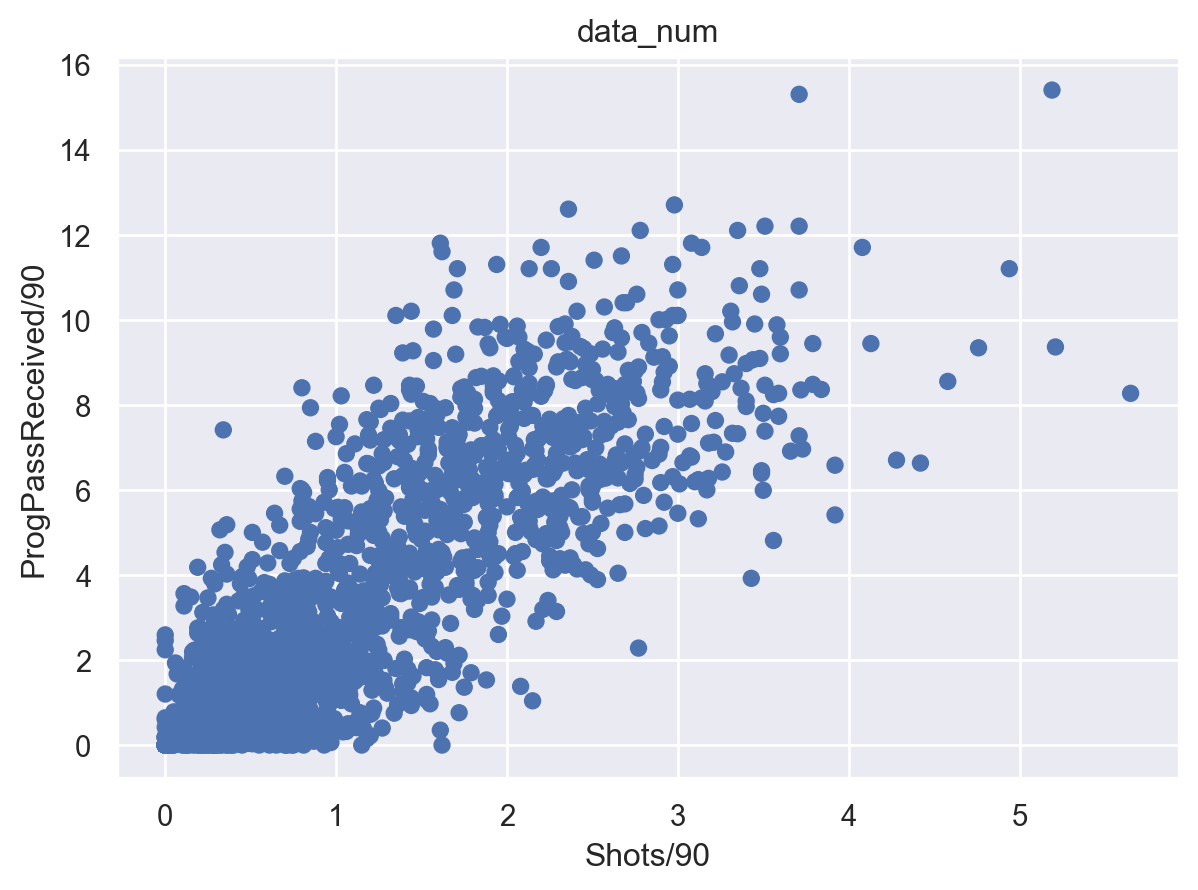

In [8]:
# Se toman dos variables cualquiera
(
    so.Plot(data_num, x = 'Shots/90', y = 'ProgPassReceived/90')
    .add(so.Dot())
    .label(title = "data_num")
)

*   Tomando por ejemplo, las variables *'Shots/90'* y *'ProgPassReceived/90'* no se observan grupos con facilidad

*   **(b)** Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? ¿A qué características de los jugadores pueden corresponder los clusters? ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)

In [9]:
# Se aplica reescalado por normalización:
data_norm = StandardScaler().fit_transform(data_num)

# Se define el modelo:
pca = PCA(n_components=2)

# Se entrena el modelo:
df_pca = pca.fit_transform(data_norm)

c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


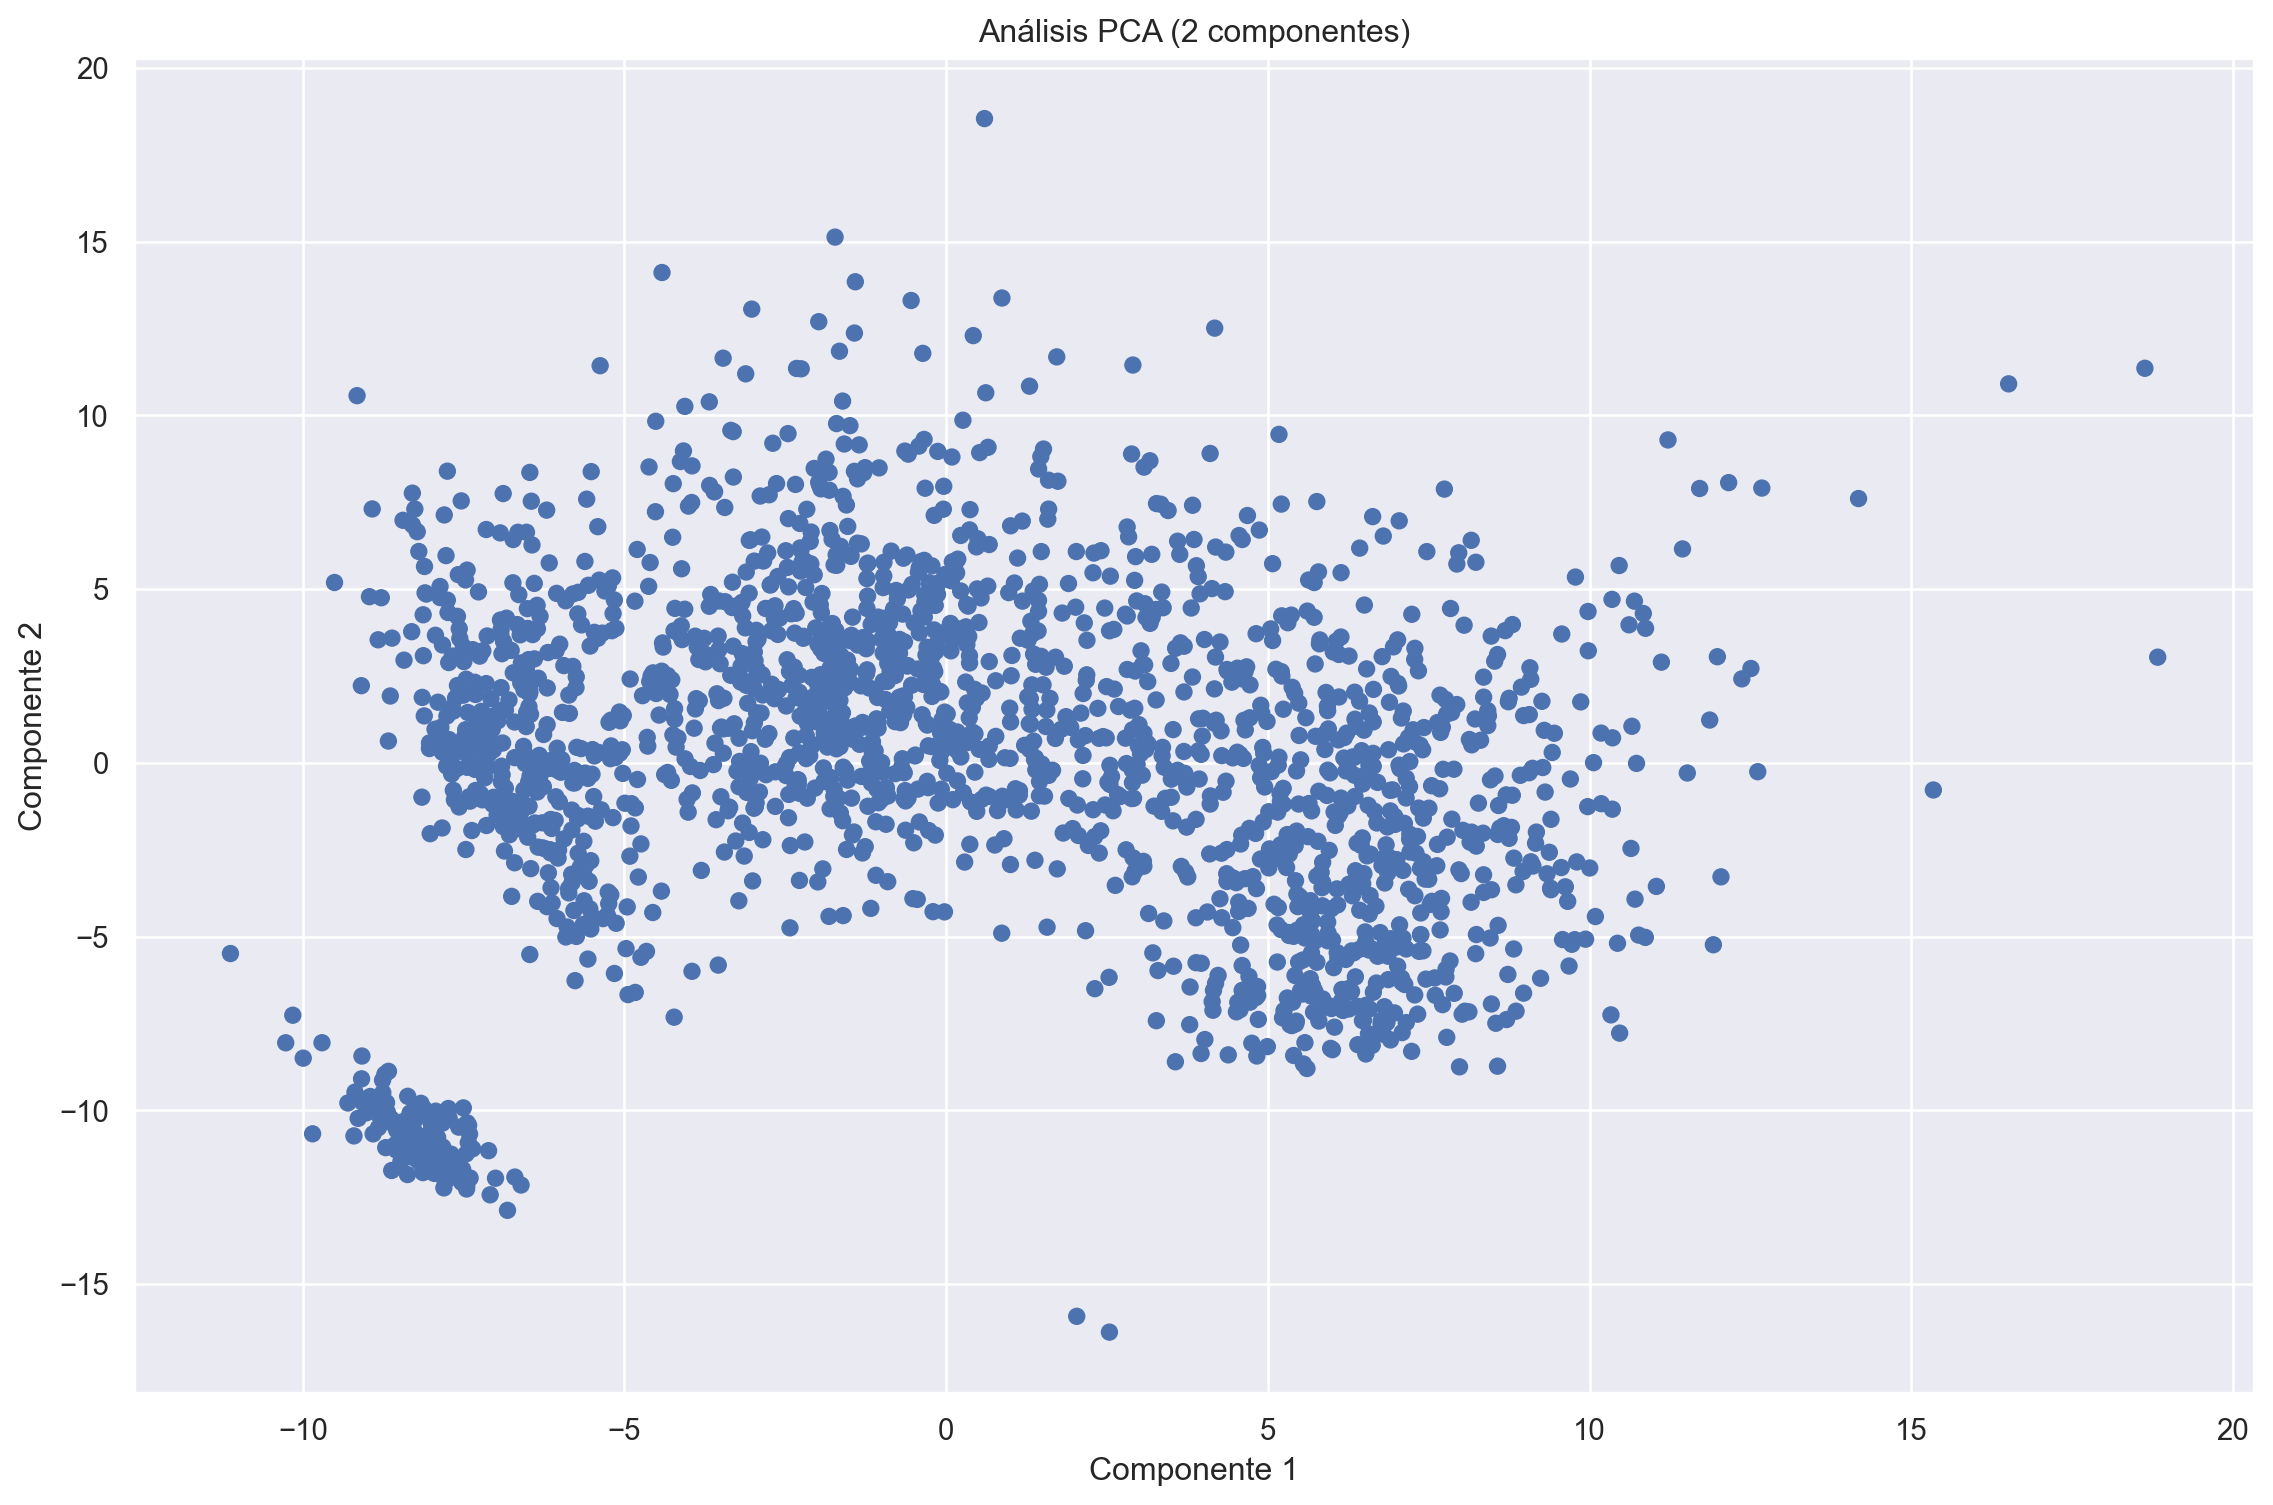

In [10]:
# Se grafica el resultado:
(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1])
    .add(so.Dot())
    .label(title = "Análisis PCA (2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

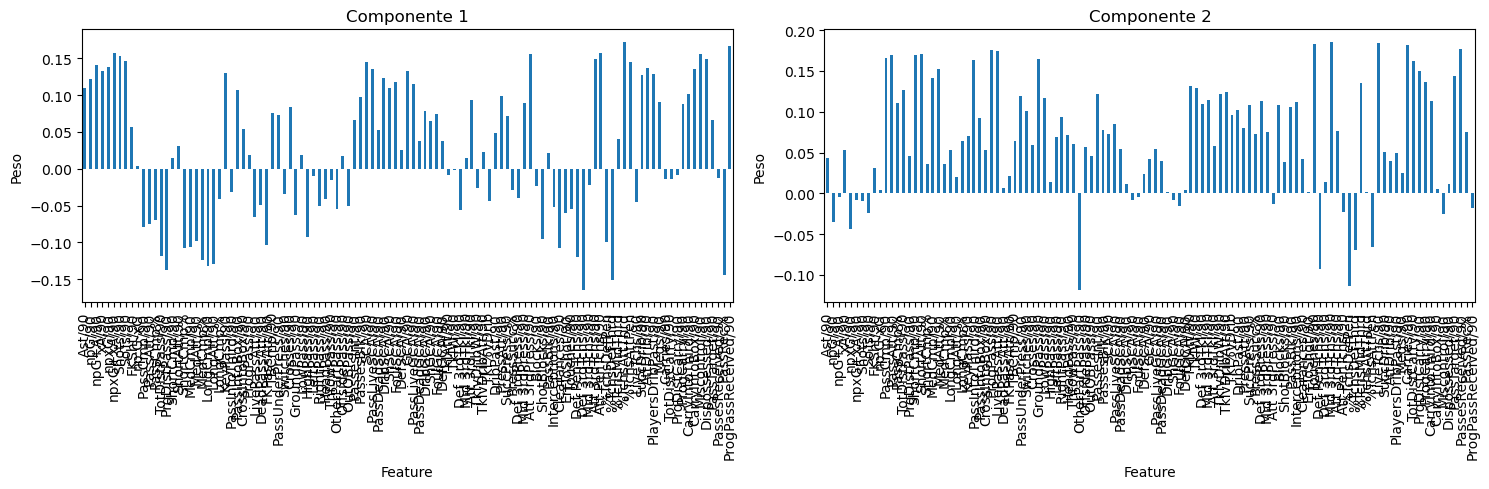

In [11]:
# Se crea un DataFrame para facilitar la interpretación
df_componentes = pd.DataFrame(pca.components_, columns=data_num.columns, index=['PC1', 'PC2'])

# Visualización de los pesos de las componentes principales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, ax in enumerate(axes):
    componentes = df_componentes.iloc[i]
    componentes.plot(kind='bar', ax=ax)
    ax.set_title(f'Componente {i+1}')
    ax.set_ylabel('Peso')
    ax.set_xlabel('Feature')

plt.tight_layout()
plt.show()

In [12]:
df_componentes

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
PC1,0.109944,0.121377,0.141309,0.132278,0.137799,0.156764,0.152551,0.146321,0.056131,0.004117,...,-0.008122,0.087878,0.100818,0.135458,0.156036,0.148921,0.066236,-0.012773,-0.144399,0.166429
PC2,0.042933,-0.035737,-0.004243,0.052737,-0.043810,-0.008122,-0.009825,-0.024629,0.031137,0.004375,...,0.150202,0.135987,0.113267,0.005159,-0.025669,0.010841,0.144198,0.177147,0.075502,-0.017455


In [13]:
for i in range(pca.n_components_):
    features_ordenados = np.abs(pca.components_[i]).argsort()[::-1]
    print(f"Top features del compomente {i+1}:")
    for feature in features_ordenados:
        print(f"Feature {df_componentes.columns[feature]}: {pca.components_[i][feature]}")
    print("\n")

Top features del compomente 1:
Feature %TchsAttThrd: 0.1723913701546462
Feature ProgPassReceived/90: 0.1664286800453803
Feature Def 3rdTchs/90: -0.164443568675944
Feature Att PenTchs/90: 0.15768713010790797
Feature npxG+xA/90: 0.1567637259159278
Feature Miscontrol/90: 0.15603611465001888
Feature Att 3rdPress/90: 0.15591354572968455
Feature Shots/90: 0.15255142609454123
Feature %TchsDefThrd: -0.1511116267076771
Feature Att 3rdTchs/90: 0.1490653984472833
Feature Dispossessed/90: 0.1489207697474401
Feature SoTs/90: 0.14632063674972315
Feature %TchsAttPen: 0.1455149731567276
Feature SCA/90: 0.14522225309798148
Feature PassRec%: -0.1443992271054802
Feature npG+A/90: 0.14130870725919864
Feature npxG/90: 0.13779930771219664
Feature PrgDistPass/90: -0.1374654349455738
Feature AttDrib/90: 0.13678154752992772
Feature PassLiveSCA/90: 0.13588348656017057
Feature CarryIntoBox/90: 0.13545776144759483
Feature xA/90: 0.13227823109407102
Feature GCA/90: 0.13199074512265352
Feature LongCmp/90: -0.131545

   **Top features del componente 1:**  %TchsAttThrd, ProgPassReceived/90, Def 3rdTchs/90.

   **Top features del componente 2:** Mid 3rdTchs/90, LiveTchs/90, Touches/90, Carries/90, PassesReceived/90

*   **Búsqueda óptima de clusters**

In [14]:
wcss = []
scaler = MinMaxScaler().set_output(transform="pandas")
data_scaled = scaler.fit_transform(data_num)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

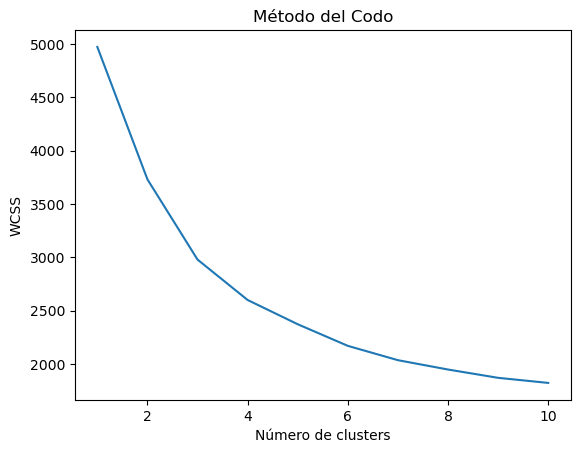

In [15]:
plt.plot(range(1,11), wcss)
plt.title("Método del Codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

*   Se determinan 4 clústers, para continuar

*   **(c)** Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por k-medias, y colorear los puntos según las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

In [16]:
# Aplicar k-means
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans.fit(data_norm)

#Reescalado de los centros, ya que usamos datos normalizados
centros_pca = pca.transform(kmeans.cluster_centers_)

c:\Users\mgres\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


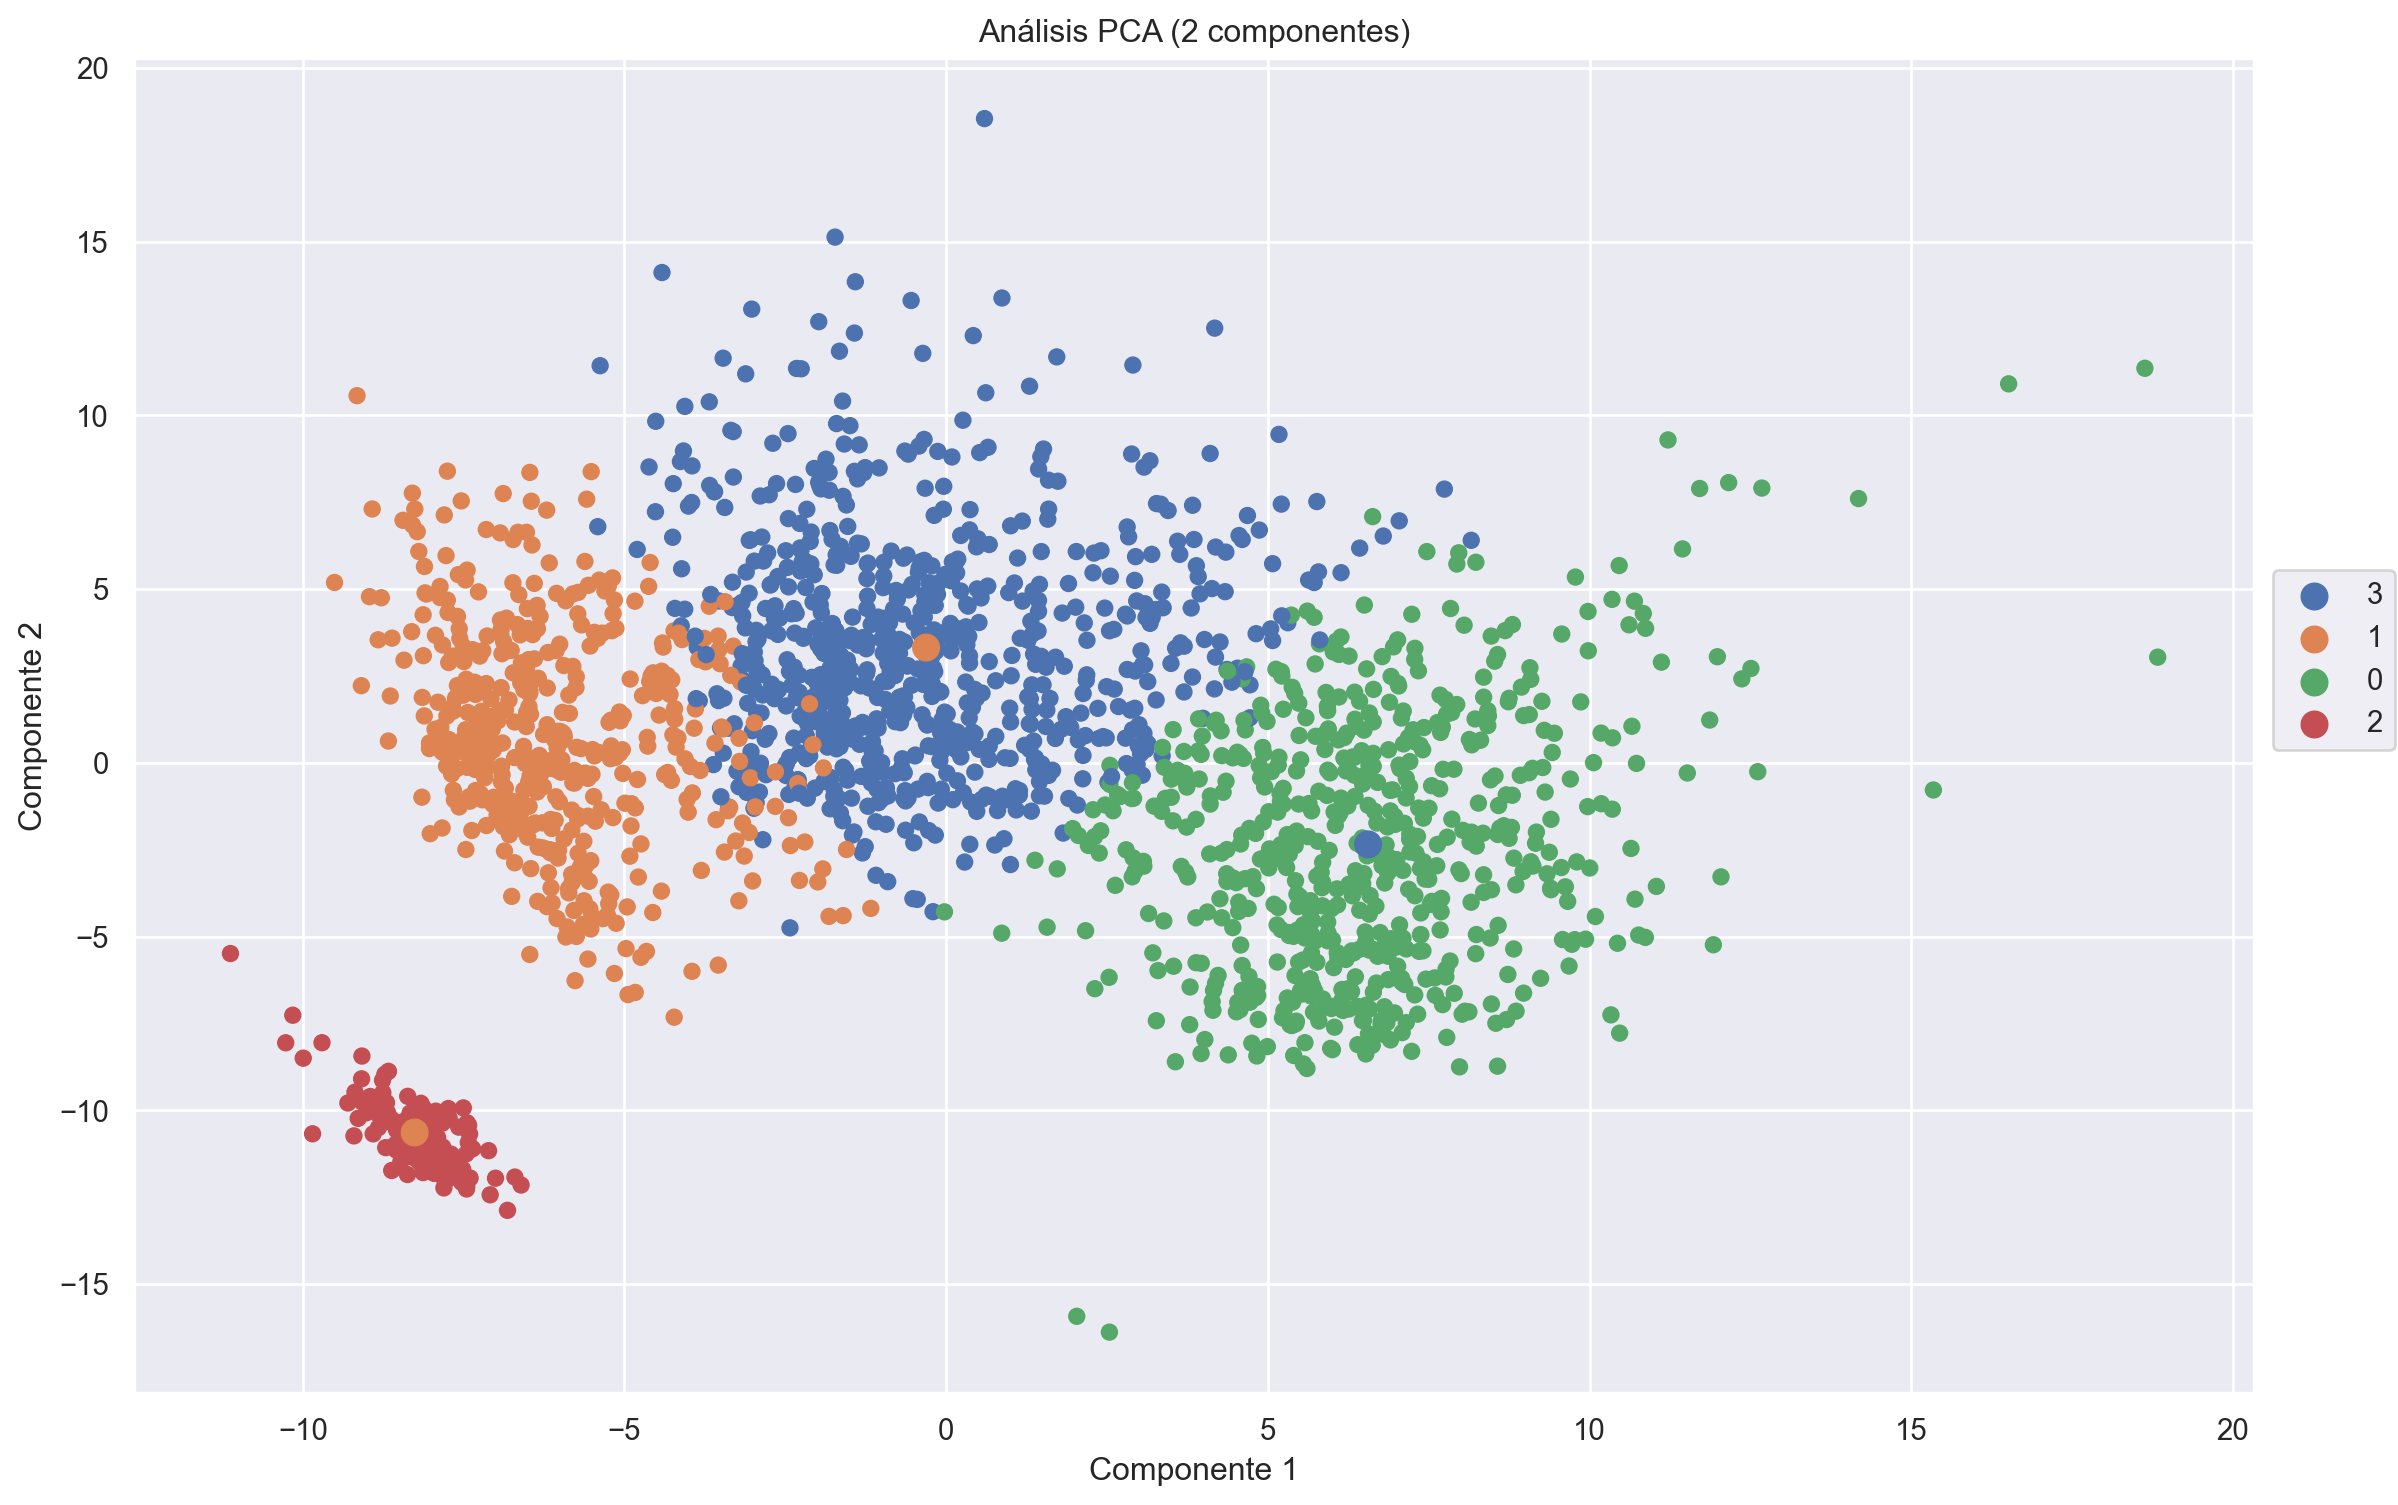

In [17]:
# Gráfica de los clusters
(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1], color = kmeans.labels_.astype("str"))
    .add(so.Dot())
    .add(so.Dot(pointsize = 10), x = centros_pca[:, 0], y = centros_pca[:, 1])
    .label(title = "Análisis PCA (2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

*   Se observa que las etiquetas coinciden con lo predicho. Los agrupamientos tienen relación con la posición que ocupan en el campo. El cluster aislado está asociado a la posición de arquero, mientras que los restantes, en orden de izquierda a derecha, agrupan defensores, mediocampistas y delanteros

In [18]:
# MF = Mediocampista
# DF = Defensor
# GK = Arquero
# FW = Delantero
pos_etiq = pd.concat([df_torneos['Pos'], pd.DataFrame(kmeans.labels_, columns = ['Clusters'])], axis = 1)
pos_etiq.groupby('Clusters').value_counts()

Clusters  Pos  
0         FW       249
          FW,MF    189
          MF,FW    123
          MF        41
          FW,DF      7
          DF,FW      5
          MF,DF      3
          DF,MF      1
          DF         1
1         DF       381
          MF        40
          DF,MF     18
          MF,DF     14
          MF,FW      1
2         GK       132
3         MF       315
          DF       313
          MF,FW     40
          DF,MF     36
          MF,DF     28
          FW,MF     11
          DF,FW     10
          FW,DF      4
Name: count, dtype: int64

*   **(d)** Repetir el agrupamiento utilizando DBSCAN. ¿Cómo elegirían en este caso un valor de ε apropiado? Sugerencia: consultar la sección ”Selección del hiperparámetro eps” del Notebook de la clase de DBSCAN (o utilizar cualquier otra técnica que consideren apropiada)

c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


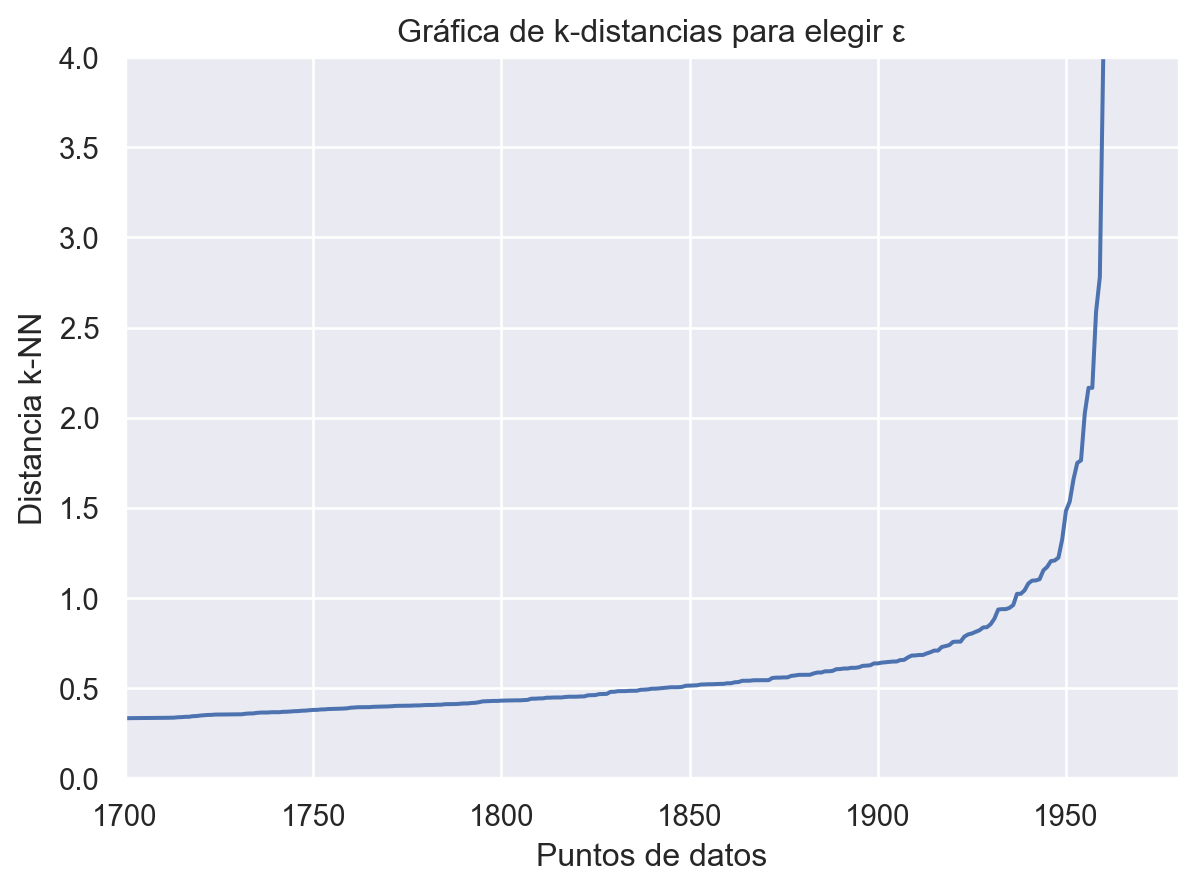

In [19]:
# Determinamos el valor de ε usando una gráfica de K-NN
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

(
    so.Plot(x = np.arange(len(distances)), y = distances)
    .add(so.Line())
    .limit(x=(1700, 1980), y=(0, 4))
    .label(title = 'Gráfica de k-distancias para elegir ε', x = 'Puntos de datos', y = 'Distancia k-NN')
)

c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


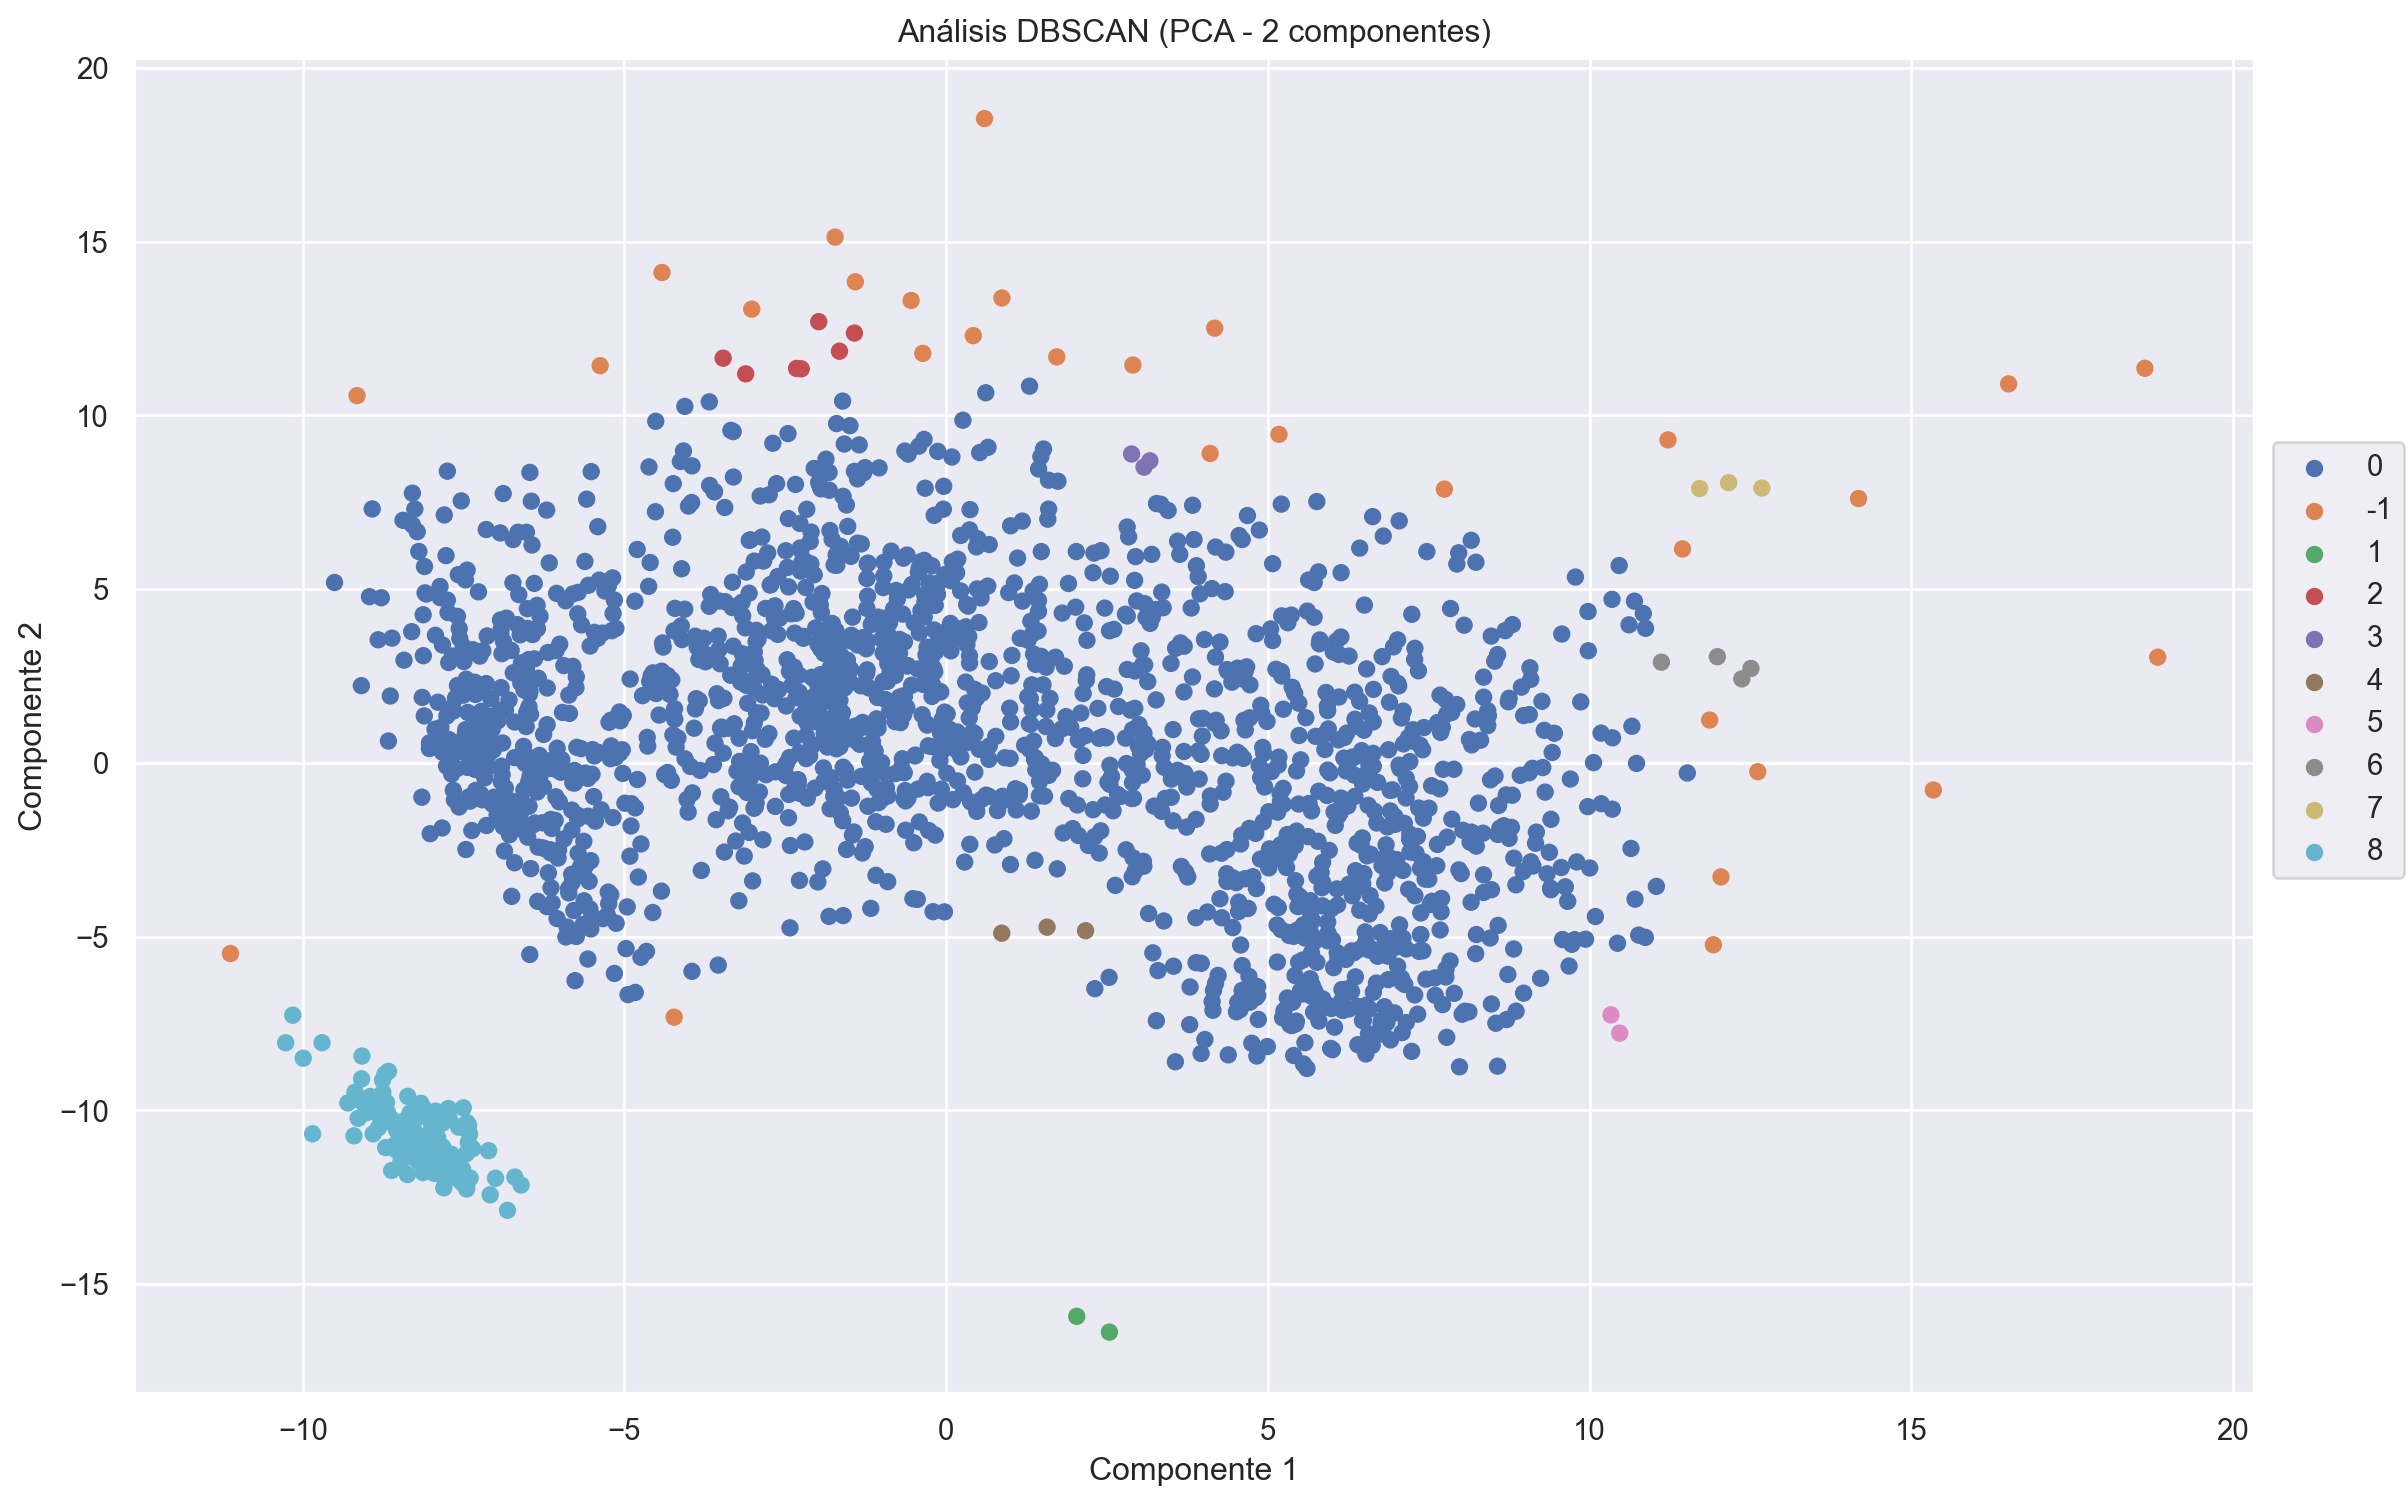

In [20]:
epsilon = 0.9

# Se aplica DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=2)
dbscan.fit(df_pca)

(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1], color = dbscan.labels_.astype("str"))
    .add(so.Dot())
    .label(title = "Análisis DBSCAN (PCA - 2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

*   Con DBSCAN sólo se obtienen los 2 grupos principales (Arquero y el resto)

In [21]:
# MF = Mediocampista
# DF = Defensor
# GK = Arquero
# FW = Delantero
pos_etiq2 = pd.concat([df_torneos['Pos'], pd.DataFrame(dbscan.labels_, columns = ['Clusters'])], axis = 1)
pos_etiq2.groupby('Clusters').value_counts()

Clusters  Pos  
-1        MF        13
          FW         5
          DF         4
          FW,MF      4
          MF,FW      2
          MF,DF      1
          GK         1
 0        DF       688
          MF       377
          FW       239
          FW,MF    191
          MF,FW    159
          DF,MF     54
          MF,DF     44
          DF,FW     14
          FW,DF     11
 1        FW         1
          DF         1
 2        MF         5
          DF         2
 3        DF,FW      1
          DF,MF      1
          MF         1
 4        MF,FW      2
          FW         1
 5        FW         2
 6        FW,MF      3
          FW         1
 7        FW,MF      2
          MF,FW      1
 8        GK       131
Name: count, dtype: int64

*   **(e)** Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos componentes principales, modificando los valores de epsilon y minPts convenientemente. ¿Con cuál de las dos opciones obtienen mejores resultados?


c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


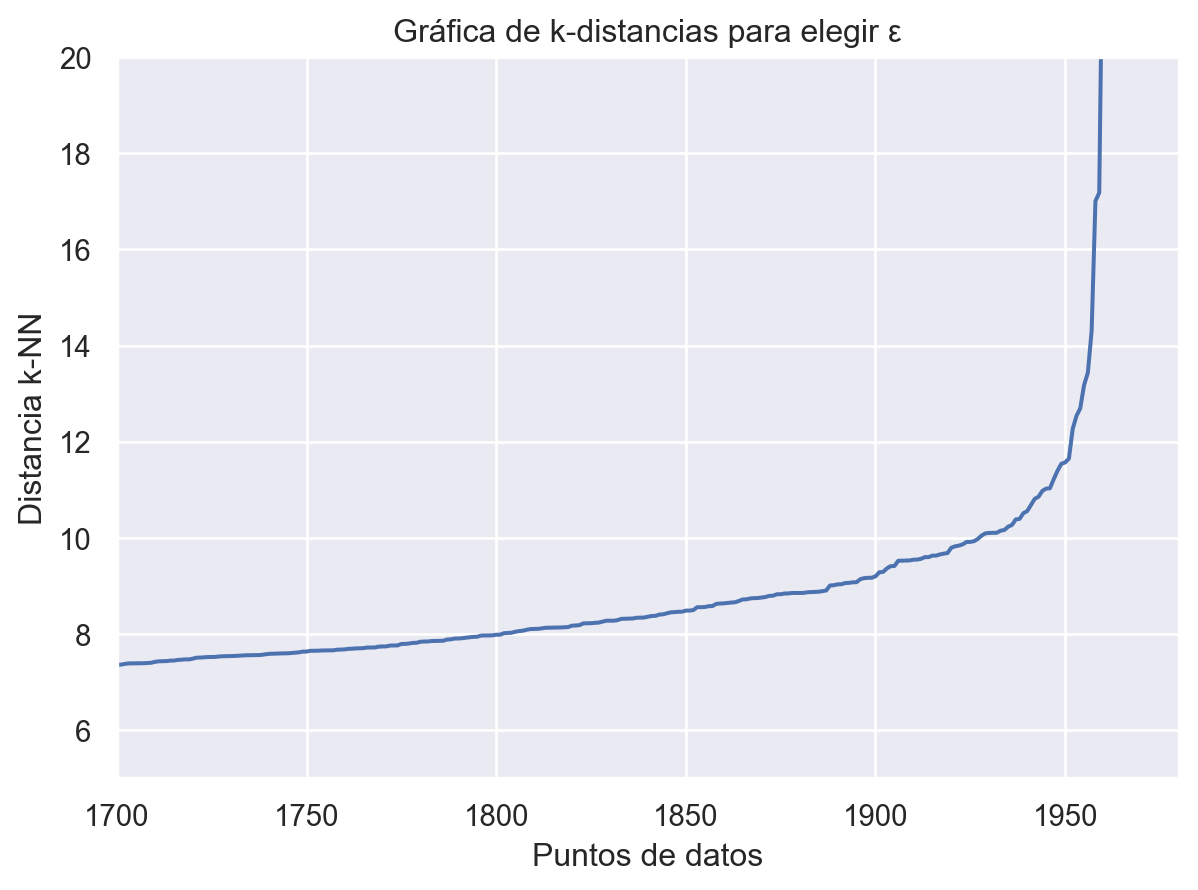

In [22]:
# Se determina el valor de ε usando una gráfica de K-NN
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_norm)
distances, indices = neighbors_fit.kneighbors(data_norm)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

(
    so.Plot(x = np.arange(len(distances)), y = distances)
    .add(so.Line())
    .limit(x=(1700, 1980), y=(5, 20))
    .label(title = 'Gráfica de k-distancias para elegir ε', x = 'Puntos de datos', y = 'Distancia k-NN')
)

c:\Users\mgres\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


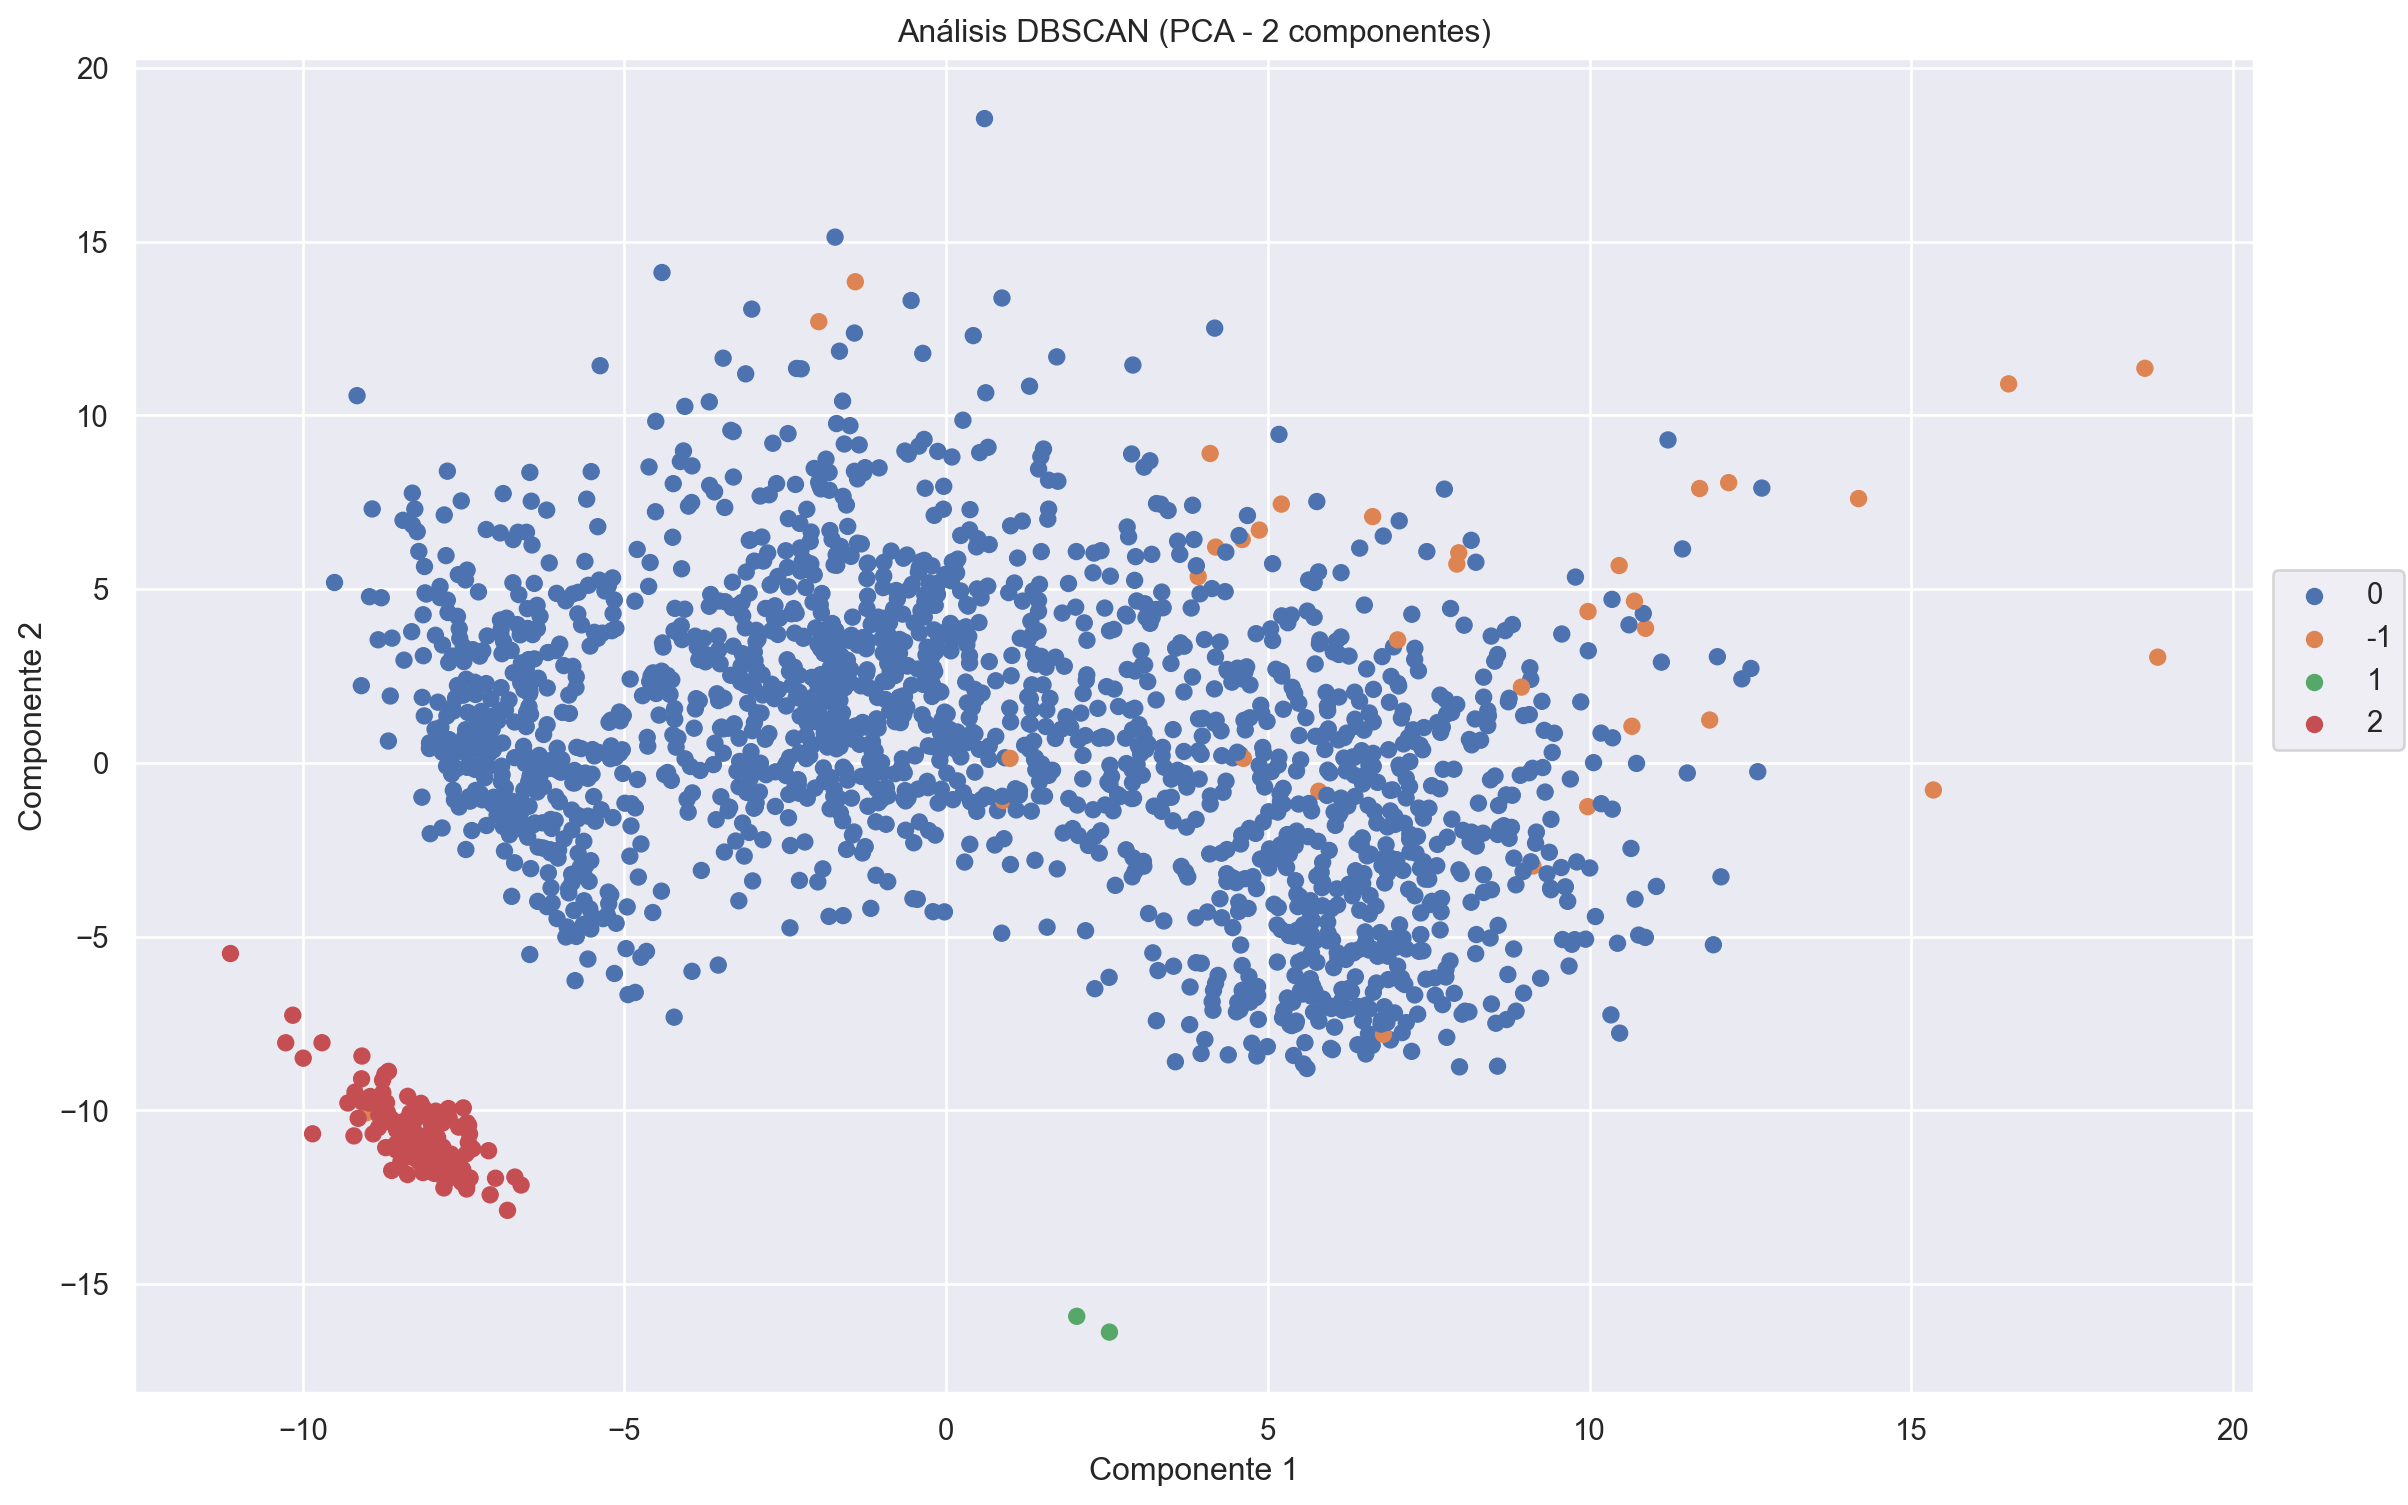

In [23]:
epsilon = 10

# Se aplica DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=2)
dbscan.fit(data_norm)

(
    so.Plot(x = df_pca[:,0], y = df_pca[:,1], color = dbscan.labels_.astype("str"))
    .add(so.Dot())
    .label(title = "Análisis DBSCAN (PCA - 2 componentes)", x = "Componente 1", y = "Componente 2")
    .layout(size=(12,8))
)

In [24]:
# MF = Mediocampista
# DF = Defensor
# GK = Arquero
# FW = Delantero
pos_etiq2 = pd.concat([df_torneos['Pos'], pd.DataFrame(dbscan.labels_, columns = ['Clusters'])], axis = 1)
pos_etiq2.groupby('Clusters').value_counts()

Clusters  Pos  
-1        FW,MF     11
          MF,FW      8
          FW         6
          MF         5
          DF         2
          DF,MF      1
          GK         1
 0        DF       692
          MF       391
          FW       242
          FW,MF    189
          MF,FW    156
          DF,MF     54
          MF,DF     45
          DF,FW     15
          FW,DF     11
 1        DF         1
          FW         1
 2        GK       131
Name: count, dtype: int64

*   Los resultados son similares al obtenido con PCA, con menos ruido, lo cual es esperable ya que PCA tiene pérdida.

## **Clasificación**

7. Ahora queremos poder predecir la posición en la que juega cada jugador según sus datos
estadísticos utilizando KNN. En la columna **Pos** encontramos la posición de los jugadores.
Para la mayoría de los jugadores se indica una única posición pero algunos jugadores tienen
dos posiciones. Para simplificar el análisis vamos a considerar una única posición por jugador.


+   **(a)** Definir la variable *"Pos_filt"* que es la columna *Pos*, pero donde los jugadores deben tener una sola posición (pueden quedarse sólo con la primera posición de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren más conveniente).

In [25]:
# Se obtienen los jugadores que tienen mas de una posición
df_torneos[np.char.str_len(df_torneos["Pos"].values.astype(str))>2]

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
695,Ruben Aguilar,fr FRA,"DF,FW",Monaco,fr Ligue 1,27.0,1993.0,33,27,2225,...,137.4,6.80,2.19,0.20,1.17,1.09,57.6,48.6,84.3,5.06
696,Marc Albrighton,eng ENG,"DF,FW",Leicester City,eng Premier League,30.0,1989.0,31,17,1746,...,95.2,4.54,1.24,0.41,1.13,2.01,47.1,37.1,78.7,3.66
697,Angeliño,es ESP,"DF,FW",RB Leipzig,de Bundesliga,23.0,1997.0,26,24,2161,...,101.0,4.83,1.21,0.58,0.88,0.92,54.7,46.0,84.2,6.25
698,Joe Bryan,eng ENG,"DF,FW",Fulham,eng Premier League,26.0,1993.0,16,7,669,...,117.6,6.22,2.16,0.00,1.49,0.68,42.3,38.4,90.7,1.35
699,Maxwel Cornet,ci CIV,"DF,FW",Lyon,fr Ligue 1,23.0,1996.0,36,29,2446,...,127.6,5.77,1.40,0.44,0.92,0.99,48.4,44.6,92.2,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1958,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1959,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1960,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [26]:
# Dada la cantidad de jugadores en esta situación, se decide asignar la primera posición de cada uno
Pos_filt=df_torneos["Pos"].str[0:2]
Pos_filt.name="Pos_filt"
Pos_filt

0       DF
1       DF
2       DF
3       DF
4       DF
        ..
1957    MF
1958    MF
1959    MF
1960    MF
1961    MF
Name: Pos_filt, Length: 1962, dtype: object

*   **(b)** Construir el DataFrame **data_clasif** que resulta de agregarle la columna de *"Pos_filt"* al DataFrame **data_num**.

    Dividir data_num en un 80% para entrenamiento y un 20% para testeo.

In [27]:
# Se genera el DataFrame data_clasif
data_clasif=pd.concat([Pos_filt,data_num], axis=1)

# Se separan las varibles de respuesta (y) de las explicativas (x)
x= data_clasif.drop(["Pos_filt"], axis=1)
y= data_clasif["Pos_filt"]

# Se escalan los datos numéricos para luego poder aplicar K-Nearest Neighbors
X = MinMaxScaler().set_output(transform="pandas").fit_transform(x)

# Se dividen los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

*   **(c)** Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de K. (Esto puede demorar mucho si prueban muchos valores de K, pueden hacerlo hasta un valor máximo de K = 20.)

    **Sugerencia:** puede resultar de ayuda KNeighborsClassifier de sklearn e investigar esa librería para aplicar esquemas de validación.

In [28]:
# Se realizará el entrenamiento probando hasta un K máximo de 20
K_max=20
K_values=np.arange(K_max) # array con índice de 0 a 19

# Teniendo en cuenta la sugerencia, se utilizará cross validation utilizando k-fold con 5 splits para cada valor de K
# Este esquema de validación se obtuvo de la documentación de sklearn: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores = np.zeros(K_max, dtype=float)

for K in K_values: # K valor entre 0 y 19
    knn = KNeighborsClassifier(n_neighbors=(K+1))
    score = cross_val_score(knn, X_train, y_train, cv=KFold(n_splits=5, random_state=10, shuffle=True), scoring=make_scorer(accuracy_score))
    scores[K] = np.mean(score)

valor_optimo_K = scores.argmax()+1
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de entrenamiento:", scores.max())

El valor óptimo de K es: 19
Precisión en los datos de entrenamiento: 0.9235099000834334


*   **(d)** Para el valor de K obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?

In [29]:
# Se verifica la precisión en los datos de testeo
knn = KNeighborsClassifier(n_neighbors=(valor_optimo_K))

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("El valor óptimo de K es:", valor_optimo_K)
print("Precisión en los datos de testeo:", accuracy_score(y_test,y_pred))

El valor óptimo de K es: 19
Precisión en los datos de testeo: 0.9211195928753181


*   **Paso extra:** A continuación se ejecuta la validación cruzada sin utilizar "cross_val_score" para verificar que el resultado es el mismo 

In [30]:
cv = KFold(n_splits=5, random_state=10, shuffle=True)
scores = np.zeros(K_max, dtype=float)

for K in range(0,20):
    neighbor = KNeighborsClassifier(n_neighbors=K+1)
    scores_fold = np.zeros(5, dtype=float)
    i=0
    
    for train_index, val_index in cv.split(X_train):
        X_train_fold, X_val_fold, y_train_fold, y_val_fold = X_train.iloc[train_index], X_train.iloc[val_index], y_train.iloc[train_index], y_train.iloc[val_index]
        neighbor.fit(X_train_fold,y_train_fold)
        y_pred_fold = neighbor.predict(X_val_fold)
        scores_fold[i]=accuracy_score(y_val_fold,y_pred_fold)
        i+=1
    
    scores[K]=scores_fold.mean()

print("El valor optimo de K es:", scores.argmax()+1)
print("Precisión:",scores.max())
        

El valor optimo de K es: 19
Precisión: 0.9235099000834334
